In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
from sklearn.preprocessing import StandardScaler
import pandas as pd
df = pd.read_csv('kc_house_data.csv')
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [2]:
#figure out age of building
df['age'] = [2015-i for i in df.yr_built]

# Switch to datetime
df.date = [i[:8] for i in df.date]
df.date = pd.to_datetime(df.date)


In [3]:
# drop the unnecessary columns
df = df.drop(['id', 'lat', 'long', 'yr_built', 'yr_renovated'], axis = 1)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,age
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,98178,1340,5650,60
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,98125,1690,7639,64
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,98028,2720,8062,82
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,98136,1360,5000,50
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,98074,1800,7503,28


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 17 columns):
date             21613 non-null datetime64[ns]
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
zipcode          21613 non-null int64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
age              21613 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(13)
memory usage: 2.8 MB


In [5]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'zipcode', 'sqft_living15', 'sqft_lot15', 'age'],
      dtype='object')

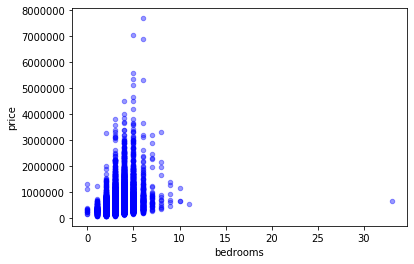

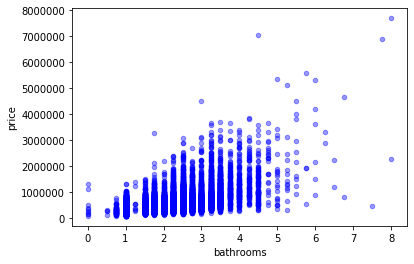

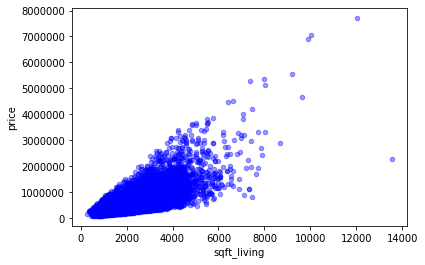

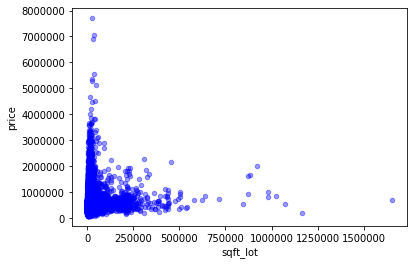

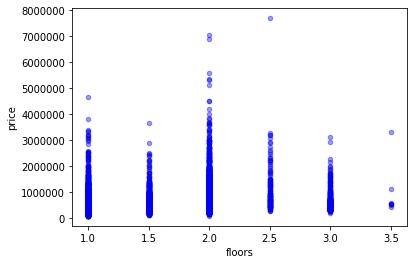

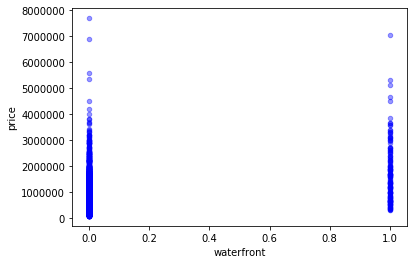

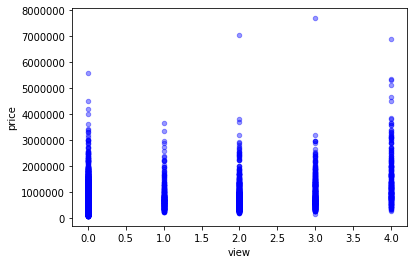

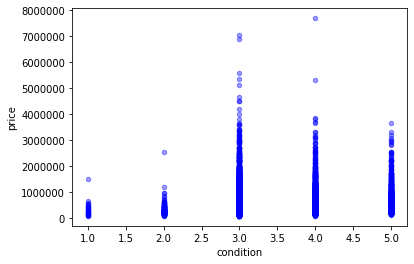

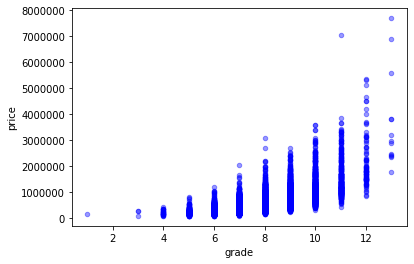

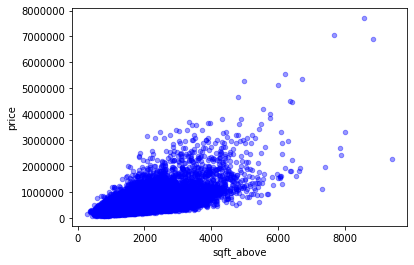

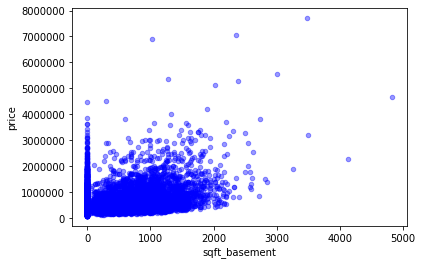

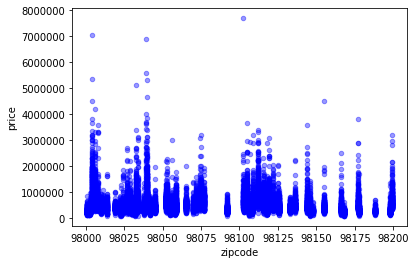

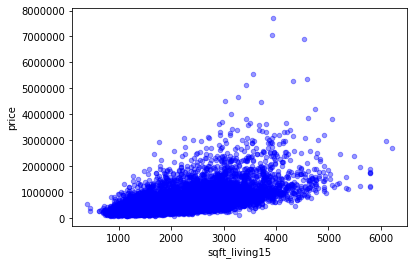

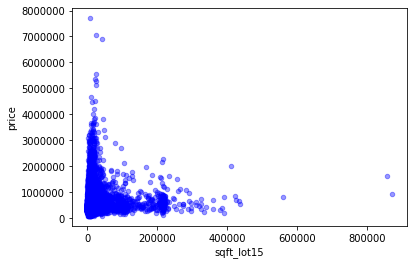

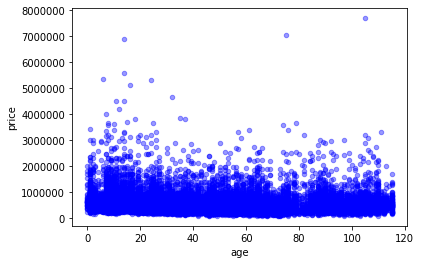

In [6]:
# see relation outcomes to independent columns
for xcol in ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'zipcode', 'sqft_living15',
       'sqft_lot15', 'age']:
    df.plot(kind='scatter', x=xcol, y='price', alpha=0.4, color='b')

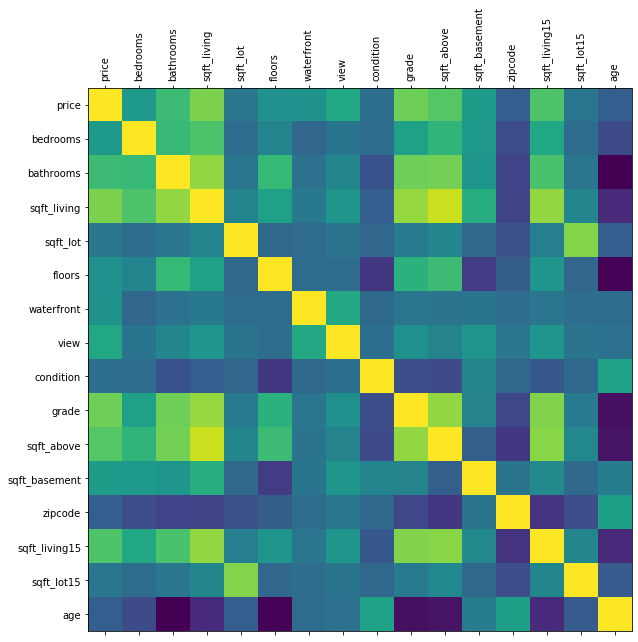

In [7]:
# see correlation of columns
corr = df.corr()
fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns, rotation = 90);
plt.yticks(range(len(corr.columns)), corr.columns);

In [8]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,age
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,-0.053203,0.585379,0.082447,-0.054012
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,-0.152668,0.391638,0.029244,-0.154178
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,-0.203866,0.568634,0.087175,-0.506019
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,-0.199430,0.756420,0.183286,-0.318049
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,-0.129574,0.144608,0.718557,-0.053080
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,-0.059121,0.279885,-0.011269,-0.489319
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,0.030285,0.086463,0.030703,0.026161
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,0.084827,0.280439,0.072575,0.053440
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,0.003026,-0.092824,-0.003406,0.361417
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,-0.184862,0.713202,0.119248,-0.446963


In [9]:
# df.zipcode = df.zipcode.astype('category')

In [10]:
# df.zipcode = df.zipcode.cat.codes

In [11]:
# df.head()

In [12]:
# switch zipcode to dummies variables
df_dummies = pd.get_dummies(df, prefix = 'zipcode_', columns = ['zipcode'])

In [13]:
#figure out effect of month on price
df_dummies.date = [i.month for i in df_dummies.date]

In [14]:
# create outcomes and independent to train 
y = df_dummies.price
X = df_dummies.drop(['price'], axis = 1)

In [39]:
# split the data to train and test
# %75 data for training %25 of data for test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.25, random_state = 1234)

# scale the train and test data
scale = StandardScaler().fit(X_train)
X_train_scale = scale.transform(X_train)
X_test_scale = scale.transform(X_test)

y_train = np.log(y_train)
y_test = np.log(y_test)
# poly = PolynomialFeatures()
# X_train_scale = poly.fit_transform(X_train_scale)
# X_test_scale = poly.transform(X_test_scale)

# create linear regression model
reg = LinearRegression().fit(X_train_scale, y_train)

In [40]:
# print out r^2 and error
print('Training R^2 :', reg.score(X_train_scale, y_train))
print('Training Root Mean Square Error', mean_squared_error(y_train, reg.predict(X_train_scale)))

print('\n----------------\n')

print('Testing R^2 :', reg.score(X_test_scale, y_test))
print('Testing Root Mean Square Error', mean_squared_error(y_test, reg.predict(X_test_scale)))

Training R^2 : 0.8780361764351429
Training Root Mean Square Error 0.03397284869974316

----------------

Testing R^2 : 0.8728493745009072
Testing Root Mean Square Error 0.03482519748861438


In [41]:
x= sum((y_test-reg.predict(X_test_scale))**2)/len(y_test)
x

0.03482519748861428

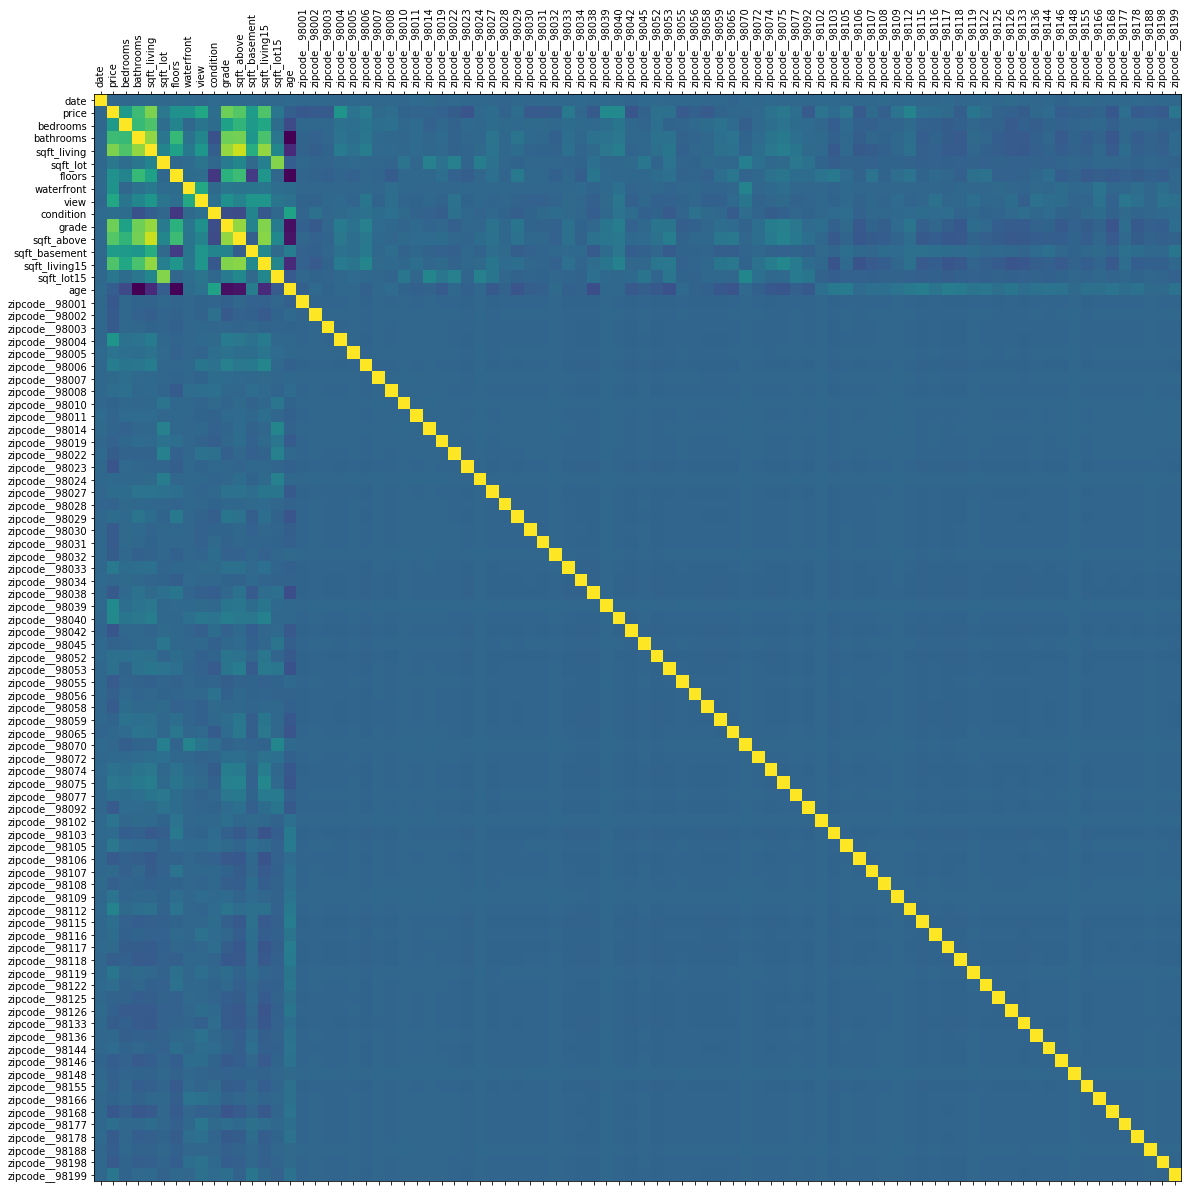

In [42]:
corr = df_dummies.corr()
fig, ax = plt.subplots(figsize=(20, 20))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns, rotation = 90);
plt.yticks(range(len(corr.columns)), corr.columns);

In [43]:
# create Lasso model
from sklearn.linear_model import Lasso

lasso = Lasso() #Lasso is also known as the L1 norm.
lasso.fit(X_train_scale, y_train)

print('Training r^2:', lasso.score(X_train_scale, y_train))
print('Testing r^2:', lasso.score(X_test_scale, y_test))
print('Training MSE:', mean_squared_error(y_train, lasso.predict(X_train_scale)))
print('Testing MSE:', mean_squared_error(y_test, lasso.predict(X_test_scale)))


Training r^2: 0.0
Testing r^2: -2.987476912297282e-06
Training MSE: 0.27854857044291753
Testing MSE: 0.273890131420048


In [44]:
# create Ridge model
from sklearn.linear_model import Ridge

ridge = Ridge() #Lasso is also known as the L1 norm.
ridge.fit(X_train_scale, y_train)

print('Training r^2:', ridge.score(X_train_scale, y_train))
print('Testing r^2:', ridge.score(X_test_scale, y_test))
print('Training MSE:', mean_squared_error(y_train, ridge.predict(X_train_scale)))
print('Testing MSE:', mean_squared_error(y_test, ridge.predict(X_test_scale)))

Training r^2: 0.8780374496940171
Testing r^2: 0.8728536761566406
Training MSE: 0.03397249403530397
Testing MSE: 0.034824019311080014


In [45]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [46]:
outcome = 'price'
mm = df_dummies.drop(['price','date'], axis = 1)
pred_sum = "+".join(mm.columns)
formula = outcome + "~" + pred_sum

In [47]:
model = ols(formula= formula, data=df_dummies).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     1104.
Date:                Tue, 26 Nov 2019   Prob (F-statistic):               0.00
Time:                        16:57:15   Log-Likelihood:            -2.8978e+05
No. Observations:               21613   AIC:                         5.797e+05
Df Residuals:                   21530   BIC:                         5.804e+05
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -3.447e+05   1.44e+04    -23.985      0.000   -3.73e+05   -3.17e+05
bedrooms        -2.71e+04   1535.527    -17.646      0.000   -3.01e+04   -2.41e+04
bathrooms       2.547e+04   2607.139      9.771      0.000    2.04e+04    3.06e+04
sqft_living      112.7885      1.838     61.366      0.000     109.186     116.391
sqft_lot           0.2374      0.039      6.159      0.000       0.162       0.313
floors         -4.436e+04   3159.451    -14.040      0.000   -5.06e+04   -3.82e+04
waterfront      6.619e+05   1.42e+04     46.744      0.000    6.34e+05     6.9e+05
view             5.56e+04   1759.912     31.592      0.000    5.21e+04     5.9e+04
condition       2.301e+04   1899.731     12.111      0.000    1.93e+04    2.67e+04
grade           5.775e+04   1819.512     31.738      0.000    5.42e+04    6.13e+04
sqft_above        95.4688      1.894     50.400      0.000      91.756      99.182
sqft_basement     17.3197      2.178      7.954      0.000      13.052      21.588
sqft_living15      9.4865      2.892      3.281      0.001       3.819      15.154
sqft_lot15        -0.1294      0.061     -2.135      0.033      -0.248      -0.011
age              827.3916     61.745     13.400      0.000     706.367     948.416
zipcode__98001 -2.039e+05   8497.308    -24.001      0.000   -2.21e+05   -1.87e+05
zipcode__98002 -1.765e+05   1.14e+04    -15.432      0.000   -1.99e+05   -1.54e+05
zipcode__98003 -2.209e+05   9614.431    -22.972      0.000    -2.4e+05   -2.02e+05
zipcode__98004  5.726e+05   9186.810     62.324      0.000    5.55e+05    5.91e+05
zipcode__98005  9.507e+04   1.25e+04      7.624      0.000    7.06e+04     1.2e+05
zipcode__98006  6.183e+04   7505.408      8.238      0.000    4.71e+04    7.65e+04
zipcode__98007   3.83e+04   1.35e+04      2.837      0.005    1.18e+04    6.48e+04
zipcode__98008   4.46e+04   9604.177      4.644      0.000    2.58e+04    6.34e+04
zipcode__98010 -1.327e+05   1.61e+04     -8.264      0.000   -1.64e+05   -1.01e+05
zipcode__98011 -8.251e+04   1.15e+04     -7.177      0.000   -1.05e+05      -6e+04
zipcode__98014 -1.033e+05   1.47e+04     -7.041      0.000   -1.32e+05   -7.45e+04
zipcode__98019 -1.126e+05   1.17e+04     -9.606      0.000   -1.36e+05   -8.96e+04
zipcode__98022 -2.154e+05   1.07e+04    -20.072      0.000   -2.36e+05   -1.94e+05
zipcode__98023  -2.39e+05   7276.386    -32.850      0.000   -2.53e+05   -2.25e+05
zipcode__98024 -4.457e+04    1.8e+04     -2.479      0.013   -7.98e+04   -9328.449
zipcode__98027 -3.654e+04   8034.336     -4.548      0.000   -5.23e+04   -2.08e+04
zipcode__98028 -8.444e+04   9556.903     -8.835      0.000   -1.03e+05   -6.57e+04
zipcode__98029  5804.9095   9088.612      0.639      0.523    -1.2e+04    2.36e+04
zipcode__98030 -1.989e+05   1.01e+04    -19.756      0.000   -2.19e+05   -1.79e+05
zipcode__980